<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/PCA_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

mnist = fetch_openml('mnist_784', version=1)

(70000, 784)
(70000,)
[0.09746116 0.16901561 0.23051091 0.28454476 0.3334341  0.37648637
 0.40926898 0.4381654  0.46574904 0.48917044 0.51023733 0.53061286
 0.5476835  0.5646237  0.58045752 0.59532097 0.60851456 0.6213047
 0.63317742 0.64470679 0.65536719 0.66546513 0.67505665 0.684153
 0.69298586 0.70137405 0.70947236 0.71732954 0.72473217 0.73163231
 0.73819375 0.74464845 0.75065664 0.75651276 0.7621803  0.767615
 0.77266217 0.77753297 0.78232252 0.78699845 0.79154214 0.79599132
 0.80017348 0.80413511 0.80797218 0.81172998 0.81534417 0.81883441
 0.82222164 0.82541855 0.82858699 0.8316882  0.83465282 0.83752323
 0.84034795 0.84304168 0.84572531 0.84828764 0.85081724 0.85326311
 0.85565702 0.85803587 0.86032539 0.86249353]
(70000, 64)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


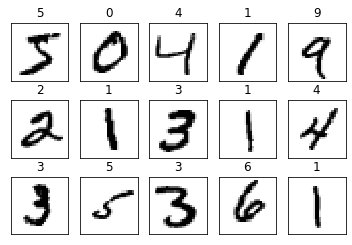

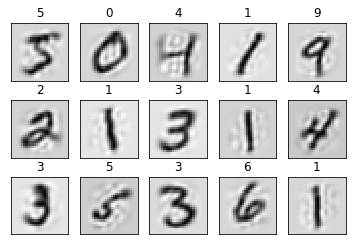

In [5]:
mnist.keys()
x = mnist.data/255.0
y = mnist.target
y=y.astype(np.uint8())
print(x.shape)
print(y.shape)

# you can set n_components to be a float between 0 and 1, indicating the ratio of varaince you wish to preserve
# or to an integer number to specify the number of prinicpal components - to reduce the dimenion of the data to n_components 
pca = PCA(n_components=8*8)  # n_components=0.8 - number of components is automatically choosen to acount for at least 80% of the total variance
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
x_reduced = pca.fit_transform(x)
x_recovered = pca.inverse_transform(x_reduced)

print(x_reduced.shape)
print(type(x))
print(type(x_recovered))
x = x.to_numpy()

def disp_digits(x):
  fig, ax = plt.subplots(3,5)
  ax = ax.flatten()
  ims = []
  for i in range(len(ax)):
    ax[i].imshow(x[i].reshape(28,28), cmap='binary', interpolation='nearest', animated=True)
    ax[i].set_title(str(y[i]))
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)

disp_digits(x)
disp_digits(x_recovered)

Mean accuracy  :  0.9038
Precision score:  0.9028918388946007
Recall score   :  0.902281197827578


<Figure size 432x288 with 0 Axes>

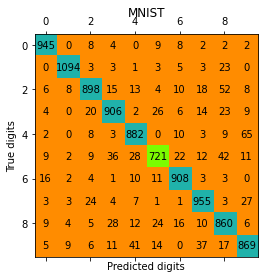

In [6]:
# use of stochastic gradient descent SGD classififier (capable of handling large datasets efficently and able to deal with training instances independently - suitable for online learning)
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from matplotlib.colors import ListedColormap

xtrain, xtest, ytrain, ytest = x_reduced[:60000], x_reduced[60000:], y[:60000], y[60000:]

model = SGDClassifier(random_state=42, verbose=0, max_iter=10000)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

print('Mean accuracy  : ', model.score(xtest, ytest))
print('Precision score: ', precision_score(ytest, y_pred, average='macro'))
print('Recall score   : ', recall_score(ytest, y_pred, average='macro'))

cm = confusion_matrix(ytest, y_pred)

cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])

plt.figure()
plt.matshow(cm, cmap=cmap)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(x=j, y=i, s=cm[i,j],va='center',ha='center')

plt.title('MNIST')
plt.xlabel('Predicted digits')
plt.ylabel('True digits')
plt.show()

#print(model.coef_)
#print(model.intercept_)